# Real-Time Bitcoin Price Analysis

This notebook performs time-series analysis on Bitcoin price data collected in real-time and stored in an AWS DynamoDB table named `BitcoinPrices`.

It demonstrates how to:
- Retrieve and process data from DynamoDB
- Clean and prepare it for analysis
- Plot time-series trends using price and timestamp

## Step 1: Load Data from DynamoDB


In [2]:
import boto3
import pandas as pd
from decimal import Decimal

# Connect to DynamoDB
dynamodb = boto3.resource('dynamodb', region_name='us-east-1')
table = dynamodb.Table('BitcoinPrices')

# Scan entire table
response = table.scan()
items = response['Items']

# Load into DataFrame
df = pd.DataFrame(items)

# Convert types
df['timestamp'] = df['timestamp'].astype(int)
df['price'] = df['price'].astype(float)
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Sort by time
df = df.sort_values('timestamp').reset_index(drop=True)
df.head()


,price,timestamp,datetime
0,84206.0,1744575538,2025-04-13 20:18:58
1,83637.0,1744577021,2025-04-13 20:43:41
2,83584.0,1744577081,2025-04-13 20:44:41
3,83576.0,1744577141,2025-04-13 20:45:41
4,83584.0,1744577201,2025-04-13 20:46:41


## Step 2: Visualize Price Trend Over Time


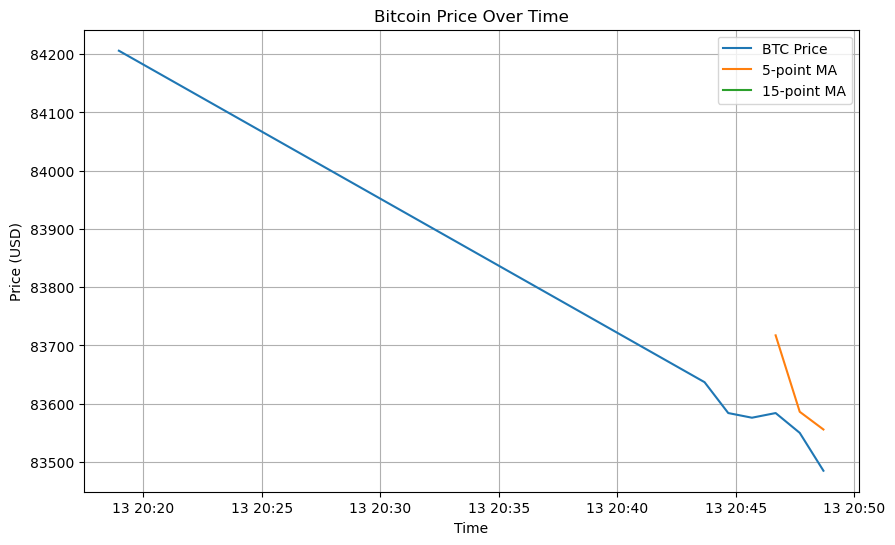

In [4]:
import matplotlib.pyplot as plt

# Moving averages
df['ma_5'] = df['price'].rolling(window=5).mean()
df['ma_15'] = df['price'].rolling(window=15).mean()

plt.figure(figsize=(10,6))
plt.plot(df['datetime'], df['price'], label='BTC Price')
plt.plot(df['datetime'], df['ma_5'], label='5-point MA')
plt.plot(df['datetime'], df['ma_15'], label='15-point MA')
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.grid()
plt.show()


## Summary

This notebook successfully demonstrates how to access and analyze real-time Bitcoin price data stored in DynamoDB. The data pipeline allows continuous ingestion and monitoring of price trends, laying the foundation for real-time analytics and alerts using AWS Lambda and DynamoDB Streams.
